#### 1. 开源制图库cartopy绘图基础
Cartopy是一个Python包，用于地理空间数据处理，以便生成地图和其他地理空间数据分析。Cartopy最初为英国气象局开发的，目的是让科学家能够快速、方便以及准确地在地图上可视化他们的数据。Cartopy在开源协议GNU GPL下对用户开放。
Cartopy是在matplotlib库基础上开发的，其与matplotlib的区别在于添加了与地理信息相关的功能，如添加投影、添加海岸线等。



In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat


1.1 cartopy投影：   
等距圆柱投影(platecarre, cartopy默认投影), 阿尔伯斯等面积投影(AlbersEqualArea), 等角圆柱投影(Mercator)
参考：https://scitools.org.uk/cartopy/docs/latest/reference/projections.html    
note: 与matplotlib搭配使用时，需通过fig.add_subplot()设置投影信息。

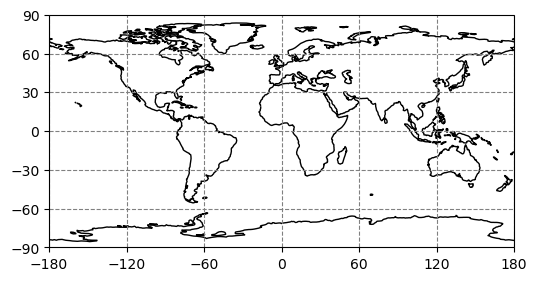

In [2]:
#### 添加地理要素、添加经纬度及格网
proj = ccrs.PlateCarree()
x_ticks = [-180,-120, -60, 0, 60, 120, 180]  ## 经度范围
y_ticks = [-90, -60, -30, 0, 30, 60,90]    ## 纬度范围
fig = plt.figure(figsize=(6,6))
ax_geo = fig.add_subplot(1,1,1, projection=proj)
ax_geo.add_feature(cfeat.COASTLINE)
ax_geo.set_xticks(x_ticks)    ## 添加经纬度
ax_geo.set_yticks(y_ticks)
ax_geo.gridlines(linestyle='--', color='grey')


Text(0.5, 1.0, 'angle-equal projection')

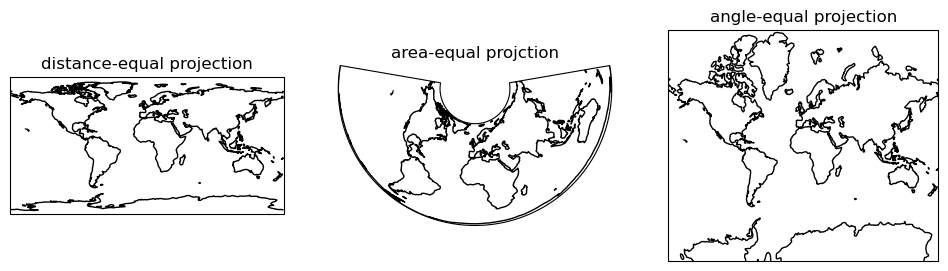

In [3]:
proj_1 = ccrs.PlateCarree()
proj_2 = ccrs.AlbersEqualArea()
proj_3 = ccrs.Mercator()
fig = plt.figure(figsize=(12,3))
ax_geo_1 = fig.add_subplot(1,3,1, projection=proj_1)
ax_geo_1.add_feature(cfeat.COASTLINE)
ax_geo_1.set_title('distance-equal projection')
ax_geo_2 = fig.add_subplot(1,3,2, projection=proj_2)
ax_geo_2.add_feature(cfeat.COASTLINE)
ax_geo_2.set_title('area-equal projction')
ax_geo_3 = fig.add_subplot(1,3,3, projection=proj_3)
ax_geo_3.add_feature(cfeat.COASTLINE)
ax_geo_3.set_title('angle-equal projection')


1.2 添加地理要素

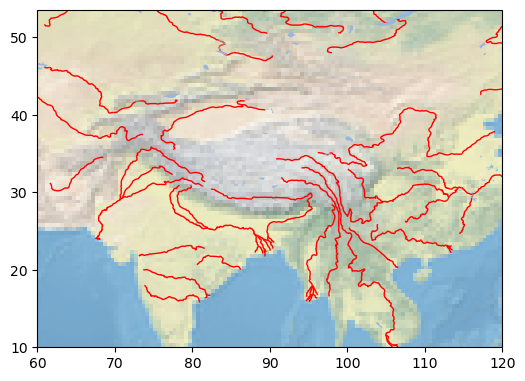

In [59]:
fig = plt.figure(figsize=(6,6))
ax_geo_1 = fig.add_subplot(1,1,1, projection=proj_1)
ax_geo_1.add_feature(cfeat.LAND)
ax_geo_1.add_feature(cfeat.OCEAN)
ax_geo_1.add_feature(cfeat.RIVERS, edgecolor='red')
ax_geo_1.add_feature(cfeat.LAKES)
ax_geo_1.stock_img()
ax_geo_1.set_extent([60.0, 120.0, 10, 50.0])
x_ticks = [60.0, 70, 80, 90, 100, 110, 120.0]## 经度范围
y_ticks = [10, 20, 30, 40, 50]    ## 纬度范围
ax_geo_1.set_xticks(x_ticks)    ## 添加经纬度
ax_geo_1.set_yticks(y_ticks)


#### 2. 利用开源制图库cartopy进行gis数据可视化



In [85]:
import numpy as np
from osgeo import gdal
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
import geopandas as gpd

2.1 矢量数据显示

In [6]:
path_kunming = 'data/Section-6/kunming_districts.geojson'


In [86]:
# kunming_geo = Reader(path_kunming).geometries()    ### 读入矢量
# kunming_cfeat = cfeat.ShapelyFeature(kunming_geo, ccrs.PlateCarree())
kunming_gpd = gpd.read_file(path_kunming)


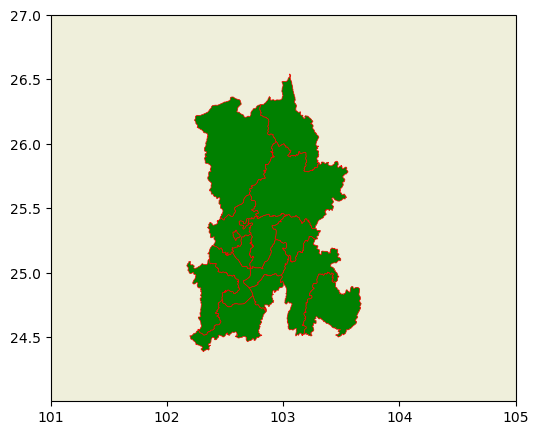

In [93]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,6))
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
ax_geo.add_feature(cfeat.LAND)
kunming_gpd.plot(ax=ax_geo, facecolor='green', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)


2.2 栅格数据显示

In [12]:
import rasterio as rio


In [21]:
path_rsimg = 'data/Section-5/s2_chenggong_20200411_6bands_20m_wgs84.tif'
rsimg_rio = rio.open(path_rsimg)


In [31]:
array_rsimg = rsimg_rio.read()
array_rsimg = array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 2000)/2000  ## 直方图拉伸
array_rsimg_ = np.where(array_rsimg_==0, 1, array_rsimg_)
### 获得用于matplotlib显示的影像范围
extent_rsimg = [rsimg_rio.bounds[0], 
                rsimg_rio.bounds[2], 
                rsimg_rio.bounds[1], 
                rsimg_rio.bounds[3]]
extent_rsimg


[102.70864034390206,
 102.99381089981256,
 24.694382912987106,
 24.995729297438114]

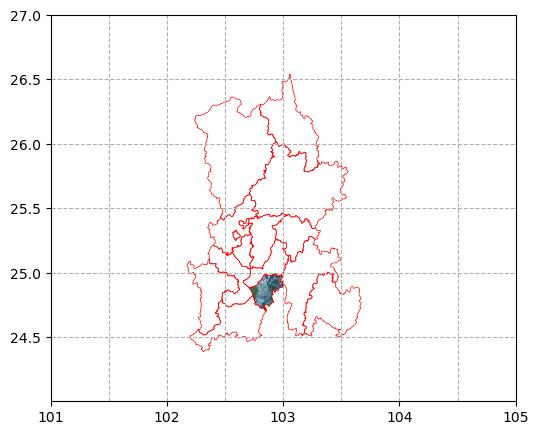

In [94]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,6))
x_ticks = [101, 102, 103, 104, 105]
y_ticks = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
# ax_geo.set_extent([102.6, 103., 24.6, 25])
ax_geo.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)
kunming_gpd.plot(ax=ax_geo, facecolor='none', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)
grid = ax_geo.gridlines(draw_labels=False, linestyle='--')
